In [7]:
from PIL import Image
import numpy as np
import os
from scipy.fftpack import idct 
from scipy.fftpack import dct 
import matplotlib.pyplot as plt

In [8]:
img = Image.open("/home/soujanya/Downloads/standard_test_images/cameraman.tif")
img = img.convert('L') 
img_array = np.array(img)

section_size = 8
num_sections = (img_array.shape[0] // section_size) * (img_array.shape[1] // section_size)


output_dir = "sections"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


section_number = 1
sections = []
for i in range(0, img_array.shape[0], section_size):
    for j in range(0, img_array.shape[1], section_size):
        section = img_array[i:i+section_size, j:j+section_size]
        sections.append(section)
        
        Image.fromarray(section).save(os.path.join(output_dir, f"section_{section_number}.tiff"))
        section_number += 1

print(f"Total sections: {len(sections)}")


Total sections: 4096


In [9]:
import os
from PIL import Image
import numpy as np
from scipy.fftpack import dct

# Define the directory containing the images and the directory to save DCT results
input_dir = "/home/soujanya/Drive-F/IIT-KGP/Jupyter_Notebook/SP_Lab_2024_AM/sections/"
output_dir = "/home/soujanya/Drive-F/IIT-KGP/Jupyter_Notebook/SP_Lab_2024_AM/dct_results/"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Loop through all the images in the directory
for filename in os.listdir(input_dir):
    if filename.endswith(".tiff"):
        # Extract the section ID from the filename (assuming it's part of the filename)
        section_id = os.path.splitext(filename)[0]  # Extracts 'section_1' from 'section_1.tiff'
        
        # Load the image
        image_path = os.path.join(input_dir, filename)
        section_img = Image.open(image_path)
        
        # Convert image to numpy array
        img_array = np.array(section_img)
        
        # Perform 2D DCT on the image array
        dct_array = dct(dct(img_array.T, norm='ortho').T, norm='ortho')
        
        # Save the DCT array as a .npy file with the section ID in the filename
        output_path = os.path.join(output_dir, f"{section_id}_dct.npy")
        np.save(output_path, dct_array)

        print(f"Processed and saved DCT for {filename} with ID {section_id}")

print("All images have been processed.")


Processed and saved DCT for section_1.tiff with ID section_1
Processed and saved DCT for section_2.tiff with ID section_2
Processed and saved DCT for section_3.tiff with ID section_3
Processed and saved DCT for section_4.tiff with ID section_4
Processed and saved DCT for section_5.tiff with ID section_5
Processed and saved DCT for section_6.tiff with ID section_6
Processed and saved DCT for section_7.tiff with ID section_7
Processed and saved DCT for section_8.tiff with ID section_8
Processed and saved DCT for section_9.tiff with ID section_9
Processed and saved DCT for section_10.tiff with ID section_10
Processed and saved DCT for section_11.tiff with ID section_11
Processed and saved DCT for section_12.tiff with ID section_12
Processed and saved DCT for section_13.tiff with ID section_13
Processed and saved DCT for section_14.tiff with ID section_14
Processed and saved DCT for section_15.tiff with ID section_15
Processed and saved DCT for section_16.tiff with ID section_16
Processed 

In [10]:
import os
from PIL import Image
import numpy as np
from scipy.fftpack import dct

def get_zigzag_indices(n):
    indices = np.zeros((n, n), dtype=int)
    index = 0
    for diag in range(2 * n - 1):
        if diag % 2 == 0:
            # Even diagonal - traverse up-right
            r = min(diag, n - 1)
            c = diag - r
            while r >= 0 and c < n:
                indices[r, c] = index
                index += 1
                r -= 1
                c += 1
        else:
            # Odd diagonal - traverse down-left
            c = min(diag, n - 1)
            r = diag - c
            while c >= 0 and r < n:
                indices[r, c] = index
                index += 1
                r += 1
                c -= 1
    return indices

def create_modified_array(original_array, input_index):
    n = original_array.shape[0]
    zigzag_indices = get_zigzag_indices(n)
    max_index = min(input_index, n*n - 1)
   
    new_array = np.zeros_like(original_array)
    for i in range(n):
        for j in range(n):
            if zigzag_indices[i, j] <= max_index:
                new_array[i, j] = original_array[i, j]
            else:
                new_array[i, j] = 0
               
    return new_array

def get_user_input():
    while True:
        try:
            # Ask user for an integer input between 0 and 63
            user_input = int(input("Enter an integer between 0 and 63: "))
            if 0 <= user_input <= 63:
                return user_input
            else:
                print("Invalid input. Please enter a number between 0 and 63.")
        except ValueError:
            print("Invalid input. Please enter a valid integer between 0 and 63.")

# Get user input for the zigzag cutoff
user_input = get_user_input()

# Define the directory containing the images and the directory to save DCT results
input_dir = "/home/soujanya/Drive-F/IIT-KGP/Jupyter_Notebook/SP_Lab_2024_AM/sections/"
dct_output_dir = "/home/soujanya/Drive-F/IIT-KGP/Jupyter_Notebook/SP_Lab_2024_AM/dct_results/"
modified_output_dir = "/home/soujanya/Drive-F/IIT-KGP/Jupyter_Notebook/SP_Lab_2024_AM/modified_results/"

# Create output directories if they don't exist
os.makedirs(dct_output_dir, exist_ok=True)
os.makedirs(modified_output_dir, exist_ok=True)

# Loop through all the images in the directory
for filename in os.listdir(input_dir):
    if filename.endswith(".tiff"):
        # Extract the section ID from the filename (assuming it's part of the filename)
        section_id = os.path.splitext(filename)[0]  # Extracts 'section_1' from 'section_1.tiff'
        
        # Load the image
        image_path = os.path.join(input_dir, filename)
        section_img = Image.open(image_path)
        
        # Convert image to numpy array
        img_array = np.array(section_img)
        
        # Perform 2D DCT on the image array
        dct_array = dct(dct(img_array.T, norm='ortho').T, norm='ortho')
        
        # Apply zigzag modification
        modified_array = create_modified_array(dct_array, user_input)
        
        # Save the original DCT array
        dct_output_path = os.path.join(dct_output_dir, f"{section_id}_dct.npy")
        np.save(dct_output_path, dct_array)

        # Save the modified array in a separate directory
        modified_output_path = os.path.join(modified_output_dir, f"{section_id}_modified.npy")
        np.save(modified_output_path, modified_array)

        print(f"Processed and saved DCT and modified array for {filename} with ID {section_id}")

print("All images have been processed.")


Enter an integer between 0 and 63:  2


Processed and saved DCT and modified array for section_1.tiff with ID section_1
Processed and saved DCT and modified array for section_2.tiff with ID section_2
Processed and saved DCT and modified array for section_3.tiff with ID section_3
Processed and saved DCT and modified array for section_4.tiff with ID section_4
Processed and saved DCT and modified array for section_5.tiff with ID section_5
Processed and saved DCT and modified array for section_6.tiff with ID section_6
Processed and saved DCT and modified array for section_7.tiff with ID section_7
Processed and saved DCT and modified array for section_8.tiff with ID section_8
Processed and saved DCT and modified array for section_9.tiff with ID section_9
Processed and saved DCT and modified array for section_10.tiff with ID section_10
Processed and saved DCT and modified array for section_11.tiff with ID section_11
Processed and saved DCT and modified array for section_12.tiff with ID section_12
Processed and saved DCT and modifi

In [11]:
import os
import numpy as np
from scipy.fftpack import idct

# Function to perform 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')

# Define the directory containing the modified arrays and the directory to save IDCT results
modified_dir = "/home/soujanya/Drive-F/IIT-KGP/Jupyter_Notebook/SP_Lab_2024_AM/modified_results/"
idct_output_dir = "/home/soujanya/Drive-F/IIT-KGP/Jupyter_Notebook/SP_Lab_2024_AM/idct_results/"

# Create output directory if it doesn't exist
os.makedirs(idct_output_dir, exist_ok=True)

# Loop through all the modified arrays in the directory
for filename in os.listdir(modified_dir):
    if filename.endswith("_modified.npy"):
        # Load the modified array
        modified_array_path = os.path.join(modified_dir, filename)
        modified_array = np.load(modified_array_path)
        
        # Perform the IDCT
        reconstructed_image = idct2(modified_array)
        
        # Ensure the reconstructed image is in the valid range (0-255) and of type uint8
        reconstructed_image = np.clip(reconstructed_image, 0, 255)
        reconstructed_image = reconstructed_image.astype(np.uint8)
        
        # Save the reconstructed image in the IDCT results directory
        idct_output_path = os.path.join(idct_output_dir, filename.replace("_modified.npy", "_idct.npy"))
        np.save(idct_output_path, reconstructed_image)

        print(f"Processed and saved IDCT for {filename}")

print("All modified arrays have been processed.")


Processed and saved IDCT for section_1_modified.npy
Processed and saved IDCT for section_2_modified.npy
Processed and saved IDCT for section_3_modified.npy
Processed and saved IDCT for section_4_modified.npy
Processed and saved IDCT for section_5_modified.npy
Processed and saved IDCT for section_6_modified.npy
Processed and saved IDCT for section_7_modified.npy
Processed and saved IDCT for section_8_modified.npy
Processed and saved IDCT for section_9_modified.npy
Processed and saved IDCT for section_10_modified.npy
Processed and saved IDCT for section_11_modified.npy
Processed and saved IDCT for section_12_modified.npy
Processed and saved IDCT for section_13_modified.npy
Processed and saved IDCT for section_14_modified.npy
Processed and saved IDCT for section_15_modified.npy
Processed and saved IDCT for section_16_modified.npy
Processed and saved IDCT for section_17_modified.npy
Processed and saved IDCT for section_18_modified.npy
Processed and saved IDCT for section_19_modified.npy
Pr

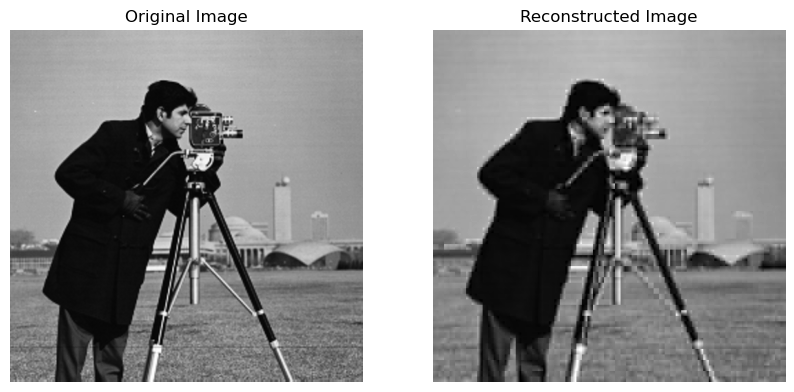

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the IDCT results directory and the size of the reconstructed large image
idct_dir = "/home/soujanya/Drive-F/IIT-KGP/Jupyter_Notebook/SP_Lab_2024_AM/idct_results/"
large_image_size = (512, 512)
small_section_size = (8, 8)
num_sections = large_image_size[0] // small_section_size[0]

# Initialize an empty array for the large reconstructed image
reconstructed_large_image = np.zeros(large_image_size, dtype=np.uint8)

# Load and place each 8x8 IDCT-reconstructed section in the correct position in the large image
for i in range(num_sections):
    for j in range(num_sections):
        section_filename = f"section_{i * num_sections + j + 1}_idct.npy"
        section_path = os.path.join(idct_dir, section_filename)
        section_array = np.load(section_path)
        
        # Place the 8x8 section in the appropriate location in the 512x512 image
        start_row = i * small_section_size[0]
        start_col = j * small_section_size[1]
        reconstructed_large_image[start_row:start_row + small_section_size[0],
                                  start_col:start_col + small_section_size[1]] = section_array

# Now, let's display the original large image and the reconstructed large image
original_large_image_path = "/home/soujanya/Downloads/standard_test_images/cameraman.tif"  
original_large_image = np.array(Image.open(original_large_image_path))

# Create a figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the original large image in the first subplot
ax[0].imshow(original_large_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')  # Hide axes

# Display the reconstructed large image in the second subplot
ax[1].imshow(reconstructed_large_image, cmap='gray')
ax[1].set_title('Reconstructed Image')
ax[1].axis('off')  # Hide axes

# Show the figure
plt.show()
